In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Overview

### Data file taken from legal US government site data.gov (LA Crime report data base) - https://data.gov/
#### CSV link - https://data.lacity.org/api/views/2nrs-mtv8/rows.csv?accessType=DOWNLOAD

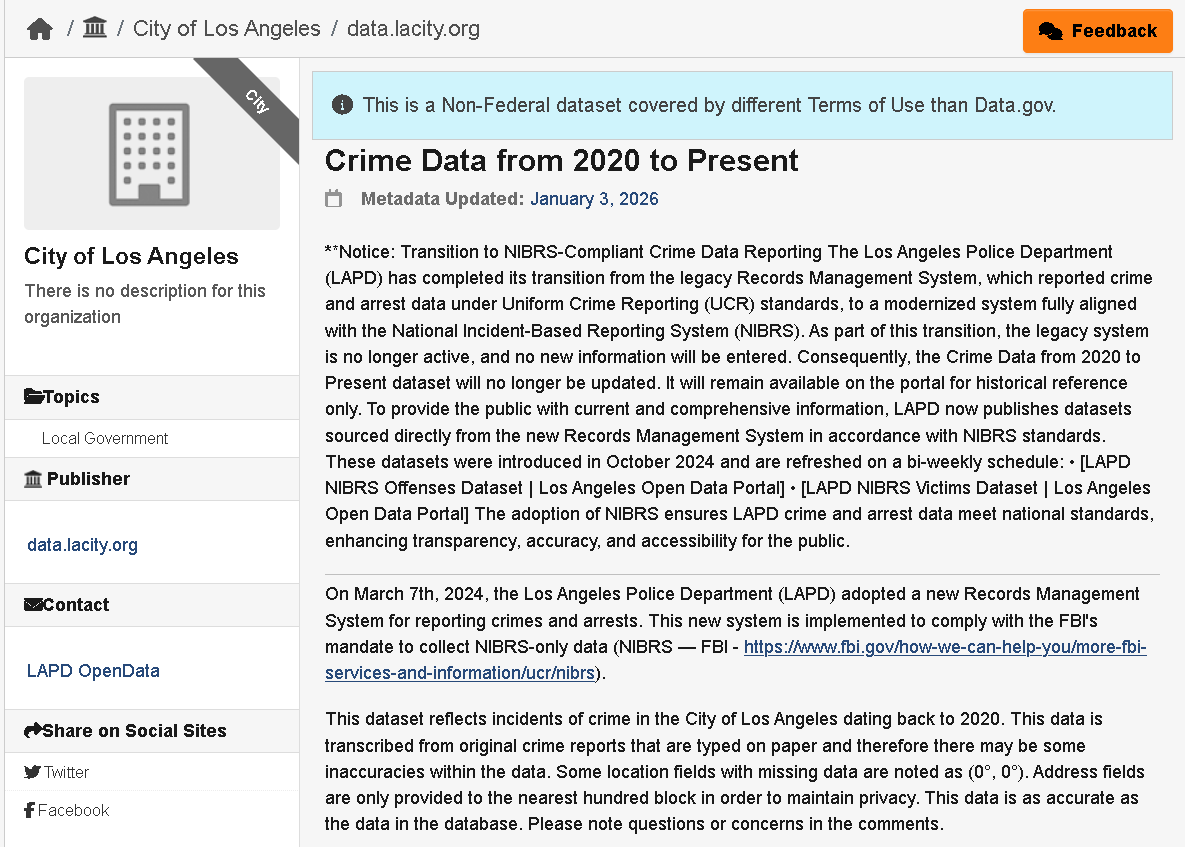

# Importing the csv data and converting to a data frame

In [2]:
df=pd.read_csv('Crime_Data_from_2020_to_Present.csv')

In [3]:
df.head(3)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,211507896,4/11/2021 0:00,11/7/2020 0:00,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092
1,201516622,10/21/2020 0:00,10/18/2020 0:00,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,ATOLL AV,N GAULT,34.1993,-118.4203
2,240913563,12/10/2024 0:00,10/30/2020 0:00,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,14600 SYLVAN ST,NaN,34.1847,-118.4509


In [4]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

# Grouping Columns

In [5]:
def groupings():
    groups={
    "Date_time_info for crime": [x for x in df.columns.str.lower() if x.startswith('date') or x.startswith('time')],
    "Area info where crime occured": [y for y in df.columns.str.lower() if 'area' in y or 'dist' in y],
    'Crime info': [a for a in df.columns.str.lower() if 'crm' in a or 'part' in a or 'mocode' in a],
    'Victim info': [b for b in df.columns.str.lower() if 'vict' in b],
    "Premises or location Type": [c for c in df.columns.str.lower() if 'premis' in c],
    "Weapon Info": [d for d in df.columns.str.lower() if 'weapon' in d],
    'Case status': [e for e in df.columns.str.lower() if 'status' in e],
    "Geo_coordinates": [f for f in df.columns.str.lower() if 'lat'in f or 'lon' in f],
    "Address info": [g for g in df.columns.str.lower() if 'location' in g or 'cross' in g],
    "Record number (Unique Case ID)": [h for h in df.columns.str.lower() if 'dr' in h]
    }
    for x, y in groups.items():
        print(f'{x} -->              {", ".join(map(str, y))}')

In [6]:
groupings()

Date_time_info for crime -->              date rptd, date occ, time occ
Area info where crime occured -->              area, area name, rpt dist no
Crime info -->              part 1-2, crm cd, crm cd desc, mocodes, crm cd 1, crm cd 2, crm cd 3, crm cd 4
Victim info -->              vict age, vict sex, vict descent
Premises or location Type -->              premis cd, premis desc
Weapon Info -->              weapon used cd, weapon desc
Case status -->              status, status desc
Geo_coordinates -->              lat, lon
Address info -->              location, cross street
Record number (Unique Case ID) -->              dr_no


# Performing EDA Exploratory Data Analysis

In [7]:
df.shape

(1004991, 28)

In [8]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [9]:
df.describe(include='all')

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
count,1.004991e+06,1004991,1004991,1.004991e+06,1.004991e+06,1004991,1.004991e+06,1.004991e+06,1.004991e+06,1004991,...,1004990,1004991,1.004980e+06,69160.000000,2314.000000,64.00000,1004991,154236,1.004991e+06,1.004991e+06
unique,NaN,1896,1879,NaN,NaN,21,NaN,NaN,NaN,140,...,6,6,NaN,NaN,NaN,NaN,66566,10413,NaN,NaN
top,NaN,2/2/2023 0:00,1/1/2020 0:00,NaN,NaN,Central,NaN,NaN,NaN,VEHICLE - STOLEN,...,IC,Invest Cont,NaN,NaN,NaN,NaN,800 N ALAMEDA ST,BROADWAY,NaN,NaN
freq,NaN,929,1164,NaN,NaN,69670,NaN,NaN,NaN,115190,...,802862,802862,NaN,NaN,NaN,NaN,2598,2486,NaN,NaN
mean,2.202215e+08,NaN,NaN,1.339900e+03,1.069174e+01,NaN,1.115633e+03,1.400348e+00,5.001568e+02,NaN,...,NaN,NaN,4.999174e+02,958.101258,984.015990,991.21875,NaN,NaN,3.399821e+01,-1.180909e+02
std,1.319718e+07,NaN,NaN,6.510613e+02,6.110255e+00,NaN,6.111605e+02,4.899691e-01,2.052731e+02,NaN,...,NaN,NaN,2.050736e+02,110.354348,52.350982,27.06985,NaN,NaN,1.610713e+00,5.582386e+00
min,8.170000e+02,NaN,NaN,1.000000e+00,1.000000e+00,NaN,1.010000e+02,1.000000e+00,1.100000e+02,NaN,...,NaN,NaN,1.100000e+02,210.000000,310.000000,821.00000,NaN,NaN,0.000000e+00,-1.186676e+02
25%,2.106169e+08,NaN,NaN,9.000000e+02,5.000000e+00,NaN,5.870000e+02,1.000000e+00,3.310000e+02,NaN,...,NaN,NaN,3.310000e+02,998.000000,998.000000,998.00000,NaN,NaN,3.401470e+01,-1.184305e+02
50%,2.209159e+08,NaN,NaN,1.420000e+03,1.100000e+01,NaN,1.139000e+03,1.000000e+00,4.420000e+02,NaN,...,NaN,NaN,4.420000e+02,998.000000,998.000000,998.00000,NaN,NaN,3.405890e+01,-1.183225e+02
75%,2.311103e+08,NaN,NaN,1.900000e+03,1.600000e+01,NaN,1.613000e+03,2.000000e+00,6.260000e+02,NaN,...,NaN,NaN,6.260000e+02,998.000000,998.000000,998.00000,NaN,NaN,3.416490e+01,-1.182739e+02


In [10]:
# from this statistics its seen than the central area is at top having crime rates which means 69670 cases from the same
# also the crime report is mostly registered for the vehicle stolen

In [11]:
df['Vict Age'].describe()

count    1.004991e+06
mean     2.891706e+01
std      2.199272e+01
min     -4.000000e+00
25%      0.000000e+00
50%      3.000000e+01
75%      4.400000e+01
max      1.200000e+02
Name: Vict Age, dtype: float64

In [12]:
df['Vict Age'].value_counts()

Vict Age
 0      269222
 30      22289
 35      21836
 31      21420
 29      21345
         ...  
 98         71
-2          28
-3           6
-4           3
 120         1
Name: count, Length: 104, dtype: int64

In [13]:
age_code_map={
    0: 'Unknown',
    -1: 'Not Recorded',
    -2: 'Refused',
    -3: 'Not Applicable',
    -4: 'Invalid Entry'
}

In [14]:
for x, y in age_code_map.items():
    print(f"{x}--> {y}")

0--> Unknown
-1--> Not Recorded
-2--> Refused
-3--> Not Applicable
-4--> Invalid Entry


In [15]:
df['Victim_Valid_age']=df['Vict Age'].copy()

In [16]:
df['Victim_Valid_age']=pd.to_numeric(df['Victim_Valid_age'],errors='coerce')

In [17]:
df.loc[(df['Victim_Valid_age'] < 1) | (df['Victim_Valid_age'] > 90),'Victim_Valid_age']=np.nan

In [18]:
df['Vict Age'].value_counts()

Vict Age
 0      269222
 30      22289
 35      21836
 31      21420
 29      21345
         ...  
 98         71
-2          28
-3           6
-4           3
 120         1
Name: count, Length: 104, dtype: int64

In [19]:
df['Vict_Age_Status'] = df['Vict Age'].map(age_code_map)

In [20]:
df['Vict_Age_Status'].value_counts()

Vict_Age_Status
Unknown           269222
Not Recorded         100
Refused               28
Not Applicable         6
Invalid Entry          3
Name: count, dtype: int64

In [21]:
df=df.drop(df[['Vict Age']],axis=1)

In [22]:
groupings()

Date_time_info for crime -->              date rptd, date occ, time occ
Area info where crime occured -->              area, area name, rpt dist no
Crime info -->              part 1-2, crm cd, crm cd desc, mocodes, crm cd 1, crm cd 2, crm cd 3, crm cd 4
Victim info -->              vict sex, vict descent, victim_valid_age, vict_age_status
Premises or location Type -->              premis cd, premis desc
Weapon Info -->              weapon used cd, weapon desc
Case status -->              status, status desc, vict_age_status
Geo_coordinates -->              lat, lon
Address info -->              location, cross street
Record number (Unique Case ID) -->              dr_no


# Checking null values

In [23]:
df.isna().sum()

DR_NO                     0
Date Rptd                 0
DATE OCC                  0
TIME OCC                  0
AREA                      0
AREA NAME                 0
Rpt Dist No               0
Part 1-2                  0
Crm Cd                    0
Crm Cd Desc               0
Mocodes              151619
Vict Sex             144644
Vict Descent         144656
Premis Cd                16
Premis Desc             588
Weapon Used Cd       677744
Weapon Desc          677744
Status                    1
Status Desc               0
Crm Cd 1                 11
Crm Cd 2             935831
Crm Cd 3            1002677
Crm Cd 4            1004927
LOCATION                  0
Cross Street         850755
LAT                       0
LON                       0
Victim_Valid_age     270686
Vict_Age_Status      735632
dtype: int64

In [24]:
means= df.isna().mean() * 100               # it is working boolean and then taking average
c=[x for x,  y in means.items() if y>70] 
c

['Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street', 'Vict_Age_Status']

In [25]:
df['Crm Cd 2'].unique()

array([ nan, 860., 998., 522., 930., 649., 624., 626., 821., 900., 480.,
       740., 812., 434., 820., 520., 761., 815., 901., 664., 933., 440.,
       888., 341., 230., 946., 510., 910., 445., 813., 745., 251., 920.,
       350., 654., 236., 997., 668., 999., 310., 980., 220., 343., 956.,
       921., 625., 647., 210., 627., 928., 903., 886., 990., 648., 940.,
       442., 653., 473., 330., 433., 420., 623., 763., 830., 662., 814.,
       451., 949., 906., 979., 753., 760., 474., 950., 431., 521., 354.,
       471., 994., 943., 250., 996., 850., 670., 666., 942., 410., 660.,
       441., 951., 810., 762., 944., 993., 972., 890., 331., 902., 932.,
       430., 931., 822., 231., 661., 978., 922., 954., 976., 651., 486.,
       948., 352., 421., 320., 945., 755., 351., 345., 235., 437., 865.,
       485., 450., 470., 438., 924., 846.])

In [26]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON', 'Victim_Valid_age', 'Vict_Age_Status'],
      dtype='object')

In [27]:
# from here less impactfull or useless columns are
droping_columns=['AREA','Crm Cd','Premis Cd','LOCATION','DR_NO','Cross Street','Status']
df=df.drop(columns=droping_columns)

In [28]:
groupings()

Date_time_info for crime -->              date rptd, date occ, time occ
Area info where crime occured -->              area name, rpt dist no
Crime info -->              part 1-2, crm cd desc, mocodes, crm cd 1, crm cd 2, crm cd 3, crm cd 4
Victim info -->              vict sex, vict descent, victim_valid_age, vict_age_status
Premises or location Type -->              premis desc
Weapon Info -->              weapon used cd, weapon desc
Case status -->              status desc, vict_age_status
Geo_coordinates -->              lat, lon
Address info -->              
Record number (Unique Case ID) -->              


In [29]:
df.columns

Index(['Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA NAME', 'Rpt Dist No',
       'Part 1-2', 'Crm Cd Desc', 'Mocodes', 'Vict Sex', 'Vict Descent',
       'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'Status Desc',
       'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LAT', 'LON',
       'Victim_Valid_age', 'Vict_Age_Status'],
      dtype='object')

In [30]:
len(df.columns)        # total 22 columns

22

# Making data readable

#### to be able to access in sql we are coverting all columns into lower case additionaly we are also remove space with '_' to readablity

In [31]:
df.columns=df.columns.str.lower()
df.columns=df.columns.str.replace(' ',"_")

In [32]:
df.columns

Index(['date_rptd', 'date_occ', 'time_occ', 'area_name', 'rpt_dist_no',
       'part_1-2', 'crm_cd_desc', 'mocodes', 'vict_sex', 'vict_descent',
       'premis_desc', 'weapon_used_cd', 'weapon_desc', 'status_desc',
       'crm_cd_1', 'crm_cd_2', 'crm_cd_3', 'crm_cd_4', 'lat', 'lon',
       'victim_valid_age', 'vict_age_status'],
      dtype='object')

# Creating a new column age group

In [33]:
bins=[0,12,19,35,61,91]
labels = ['Child', 'Teen', 'Young_Adult', 'Adult', 'Senior']
df["age_groups"]=pd.cut(df['victim_valid_age'],bins=bins,labels=labels)

In [34]:
df['time_occ']

0           845
1          1845
2          1240
3          1310
4          1830
           ... 
1004986     130
1004987    1000
1004988    1554
1004989    1600
1004990    1235
Name: time_occ, Length: 1004991, dtype: int64

In [35]:
df['time_occ']=df['time_occ']//100

In [36]:
df['time_occ'].value_counts()

time_occ
12    67813
18    59958
17    58811
20    56350
19    55597
16    52976
15    52824
21    50793
14    49301
22    49103
13    45587
11    43666
10    43027
23    42279
0     40468
8     37249
9     36524
1     29761
7     26267
2     25214
6     23185
3     22191
4     18757
5     17290
Name: count, dtype: int64

In [37]:
bins = [3, 12, 17, 21]
labels = ['Morning', 'Afternoon', 'Evening']


df['time_period']=pd.cut(df['time_occ'],
           bins=bins,
           labels=labels,
           right=False)


In [38]:
df['time_period'] = np.where(
    (df['time_occ'] >= 21) | (df['time_occ'] <= 3),
    'Night',
    df['time_period']
)

In [39]:
df['time_period'].value_counts()

time_period
Afternoon    268501
Night        259809
Morning      245965
Evening      230716
Name: count, dtype: int64

# Connect jupyter to MySQL

In [48]:
pip install psycopg2-binary  pymysql

Note: you may need to restart the kernel to use updated packages.


## connecting to Mysql

In [53]:
from sqlalchemy import create_engine
import pymysql

username='root'
password='root'
host='localhost'
port=3306
database='db'
engine =create_engine(f'mysql+pymysql://{username}:{password}@{host}:{port}/{database}')
table_name= 'la_crime_data'
df.to_sql(table_name, engine, if_exists='replace',index=False)
print("Data succesfully loaded into table")

Data succesfully loaded into table
